# Sepsis Process Mining Analysis
This notebook analyzes the Sepsis event log from the BPI Challenge 2017, published by Eindhoven University of Technology (TU/e). The dataset is widely used in process-mining research because it captures real-world emergency care behavior for patients suspected of sepsis.Each trace corresponds to a single patient journey through the hospital, and each event represents a clinical activity such as registration, lab tests, diagnostic procedures, or treatment steps.
The dataset includes detailed timestamps, diagnostic attributes, and pathways, making it valuable for:

- understanding patient flow

- identifying clinical bottlenecks

- measuring delays between critical steps

- visualizing actual care processes

- evaluating cycle time and performance

By applying process-mining techniques (e.g., inductive miner, DFG frequency maps, performance maps), this notebook provides a structured exploration of the clinical workflow, highlights potential inefficiencies, and demonstrates how data-driven insights can help improve emergency department operations.


## 1. Import Libraries
We begin by importing the required libraries for data handling, visualization, and PM4Py mining components.


In [2]:
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.objects.conversion.log import converter as log_converter
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image


## 2. Load Event Log (XES)
The Sepsis dataset is loaded in XES format. Each trace represents a patient; each event a clinical step.


In [3]:
log = xes_importer.apply("Sepsis Cases - Event Log.xes")
log

c:\sepsis_project\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
parsing log, completed traces :: 100%|██████████| 1050/1050 [00:00<00:00, 2482.33it/s]


[{'attributes': {'concept:name': 'A'}, 'events': [{'InfectionSuspected': True, 'org:group': 'A', 'DiagnosticBlood': True, 'DisfuncOrg': True, 'SIRSCritTachypnea': True, 'Hypotensie': True, 'SIRSCritHeartRate': True, 'Infusion': True, 'DiagnosticArtAstrup': True, 'concept:name': 'ER Registration', 'Age': 85, 'DiagnosticIC': True, 'DiagnosticSputum': False, 'DiagnosticLiquor': False, 'DiagnosticOther': False, 'SIRSCriteria2OrMore': True, 'DiagnosticXthorax': True, 'SIRSCritTemperature': True, 'time:timestamp': datetime.datetime(2014, 10, 22, 11, 15, 41, tzinfo=datetime.timezone.utc), 'DiagnosticUrinaryCulture': True, 'SIRSCritLeucos': False, 'Oligurie': False, 'DiagnosticLacticAcid': True, 'lifecycle:transition': 'complete', 'Diagnose': 'A', 'Hypoxie': False, 'DiagnosticUrinarySediment': True, 'DiagnosticECG': True}, '..', {'org:group': 'E', 'lifecycle:transition': 'complete', 'concept:name': 'Release A', 'time:timestamp': datetime.datetime(2014, 11, 2, 15, 15, tzinfo=datetime.timezone.u

## 3. Convert Log to DataFrame
I have converted the event log to a pandas DataFrame so, it allows computing cycle times and delays.


In [4]:
df = log_converter.apply(log, variant=log_converter.Variants.TO_DATA_FRAME)
df.head()

,InfectionSuspected,org:group,DiagnosticBlood,DisfuncOrg,SIRSCritTachypnea,Hypotensie,SIRSCritHeartRate,Infusion,DiagnosticArtAstrup,concept:name,...,DiagnosticLacticAcid,lifecycle:transition,Diagnose,Hypoxie,DiagnosticUrinarySediment,DiagnosticECG,case:concept:name,Leucocytes,CRP,LacticAcid
0,True,A,True,True,True,True,True,True,True,ER Registration,...,True,complete,A,False,True,True,A,NaN,NaN,NaN
1,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Leucocytes,...,NaN,complete,NaN,NaN,NaN,NaN,A,9.6,NaN,NaN
2,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CRP,...,NaN,complete,NaN,NaN,NaN,NaN,A,NaN,21.0,NaN
3,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LacticAcid,...,NaN,complete,NaN,NaN,NaN,NaN,A,NaN,NaN,2.2
4,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ER Triage,...,NaN,complete,NaN,NaN,NaN,NaN,A,NaN,NaN,NaN


## 4. Sort Events Chronologically
Sorting ensures each patient's events are in correct timestamp order.


In [5]:
df["time:timestamp"] = pd.to_datetime(df["time:timestamp"])
df = df.sort_values(["case:concept:name", "time:timestamp"])
df.head()

,InfectionSuspected,org:group,DiagnosticBlood,DisfuncOrg,SIRSCritTachypnea,Hypotensie,SIRSCritHeartRate,Infusion,DiagnosticArtAstrup,concept:name,...,DiagnosticLacticAcid,lifecycle:transition,Diagnose,Hypoxie,DiagnosticUrinarySediment,DiagnosticECG,case:concept:name,Leucocytes,CRP,LacticAcid
0,True,A,True,True,True,True,True,True,True,ER Registration,...,True,complete,A,False,True,True,A,NaN,NaN,NaN
1,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Leucocytes,...,NaN,complete,NaN,NaN,NaN,NaN,A,9.6,NaN,NaN
2,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CRP,...,NaN,complete,NaN,NaN,NaN,NaN,A,NaN,21.0,NaN
3,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LacticAcid,...,NaN,complete,NaN,NaN,NaN,NaN,A,NaN,NaN,2.2
4,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ER Triage,...,NaN,complete,NaN,NaN,NaN,NaN,A,NaN,NaN,NaN


## 5. Cycle Time Calculation
I have computed the duration between the first and last event in each patient's trace.


In [6]:
cycle_time = df.groupby("case:concept:name")["time:timestamp"].agg(["min", "max"])
cycle_time["total_hours"] = ((cycle_time["max"] - cycle_time["min"]).dt.total_seconds()/3600)
cycle_time.head()

,min,max,total_hours
case:concept:name,,,
A,2014-10-22 11:15:41+00:00,2014-11-02 15:15:00+00:00,267.988611
AA,2014-12-03 09:06:44+00:00,2014-12-03 14:28:01+00:00,5.354722
AAA,2014-11-19 03:16:21+00:00,2014-11-28 16:15:17+00:00,228.982222
AB,2014-02-16 09:55:43+00:00,2014-02-16 13:52:06+00:00,3.939722
ABA,2014-10-12 11:22:24+00:00,2014-10-18 16:15:00+00:00,148.876667


## 6. Cycle Time Statistics
Summary statistics (mean, median, max) help understand typical patient journey lengths.


In [13]:
print("Mean:", cycle_time["total_hours"].mean())
print("Median:", cycle_time["total_hours"].median())

Mean: 683.2641896825397
Median: 128.24125


## 7. Outlier Filtering
I have filtered patients with extremely long cycle times (>1000 hours) to make visualizations meaningful.


In [8]:
filtered_cycle = cycle_time[cycle_time["total_hours"] <= 1000]
filtered_cycle.head()

,min,max,total_hours
case:concept:name,,,
A,2014-10-22 11:15:41+00:00,2014-11-02 15:15:00+00:00,267.988611
AA,2014-12-03 09:06:44+00:00,2014-12-03 14:28:01+00:00,5.354722
AAA,2014-11-19 03:16:21+00:00,2014-11-28 16:15:17+00:00,228.982222
AB,2014-02-16 09:55:43+00:00,2014-02-16 13:52:06+00:00,3.939722
ABA,2014-10-12 11:22:24+00:00,2014-10-18 16:15:00+00:00,148.876667


## 8. Bottleneck Delay Analysis
Using per‑trace shifts, we compute average waiting times between critical clinical transitions.
*Examples:* ER Registration --> CRP, CRP --> Lactate, Diagnose --> Antibiotics.


In [9]:
df["next_activity"] = df.groupby("case:concept:name")["concept:name"].shift(-1)
df["next_time"] = df.groupby("case:concept:name")["time:timestamp"].shift(-1)
df["minutes_to_next"] = (df["next_time"] - df["time:timestamp"]).dt.total_seconds()/60
er_to_crp = df[(df["concept:name"]=="ER Registration") & (df["next_activity"]=="CRP")]["minutes_to_next"].mean()
er_to_crp

np.float64(16.404761904761905)

## 9. Process Map (Inductive Miner)
I have applied the Inductive Miner to discover a Petri‑net model that represents the end‑to‑end clinical process.
The Petri net structure has been visualized using Graphviz.


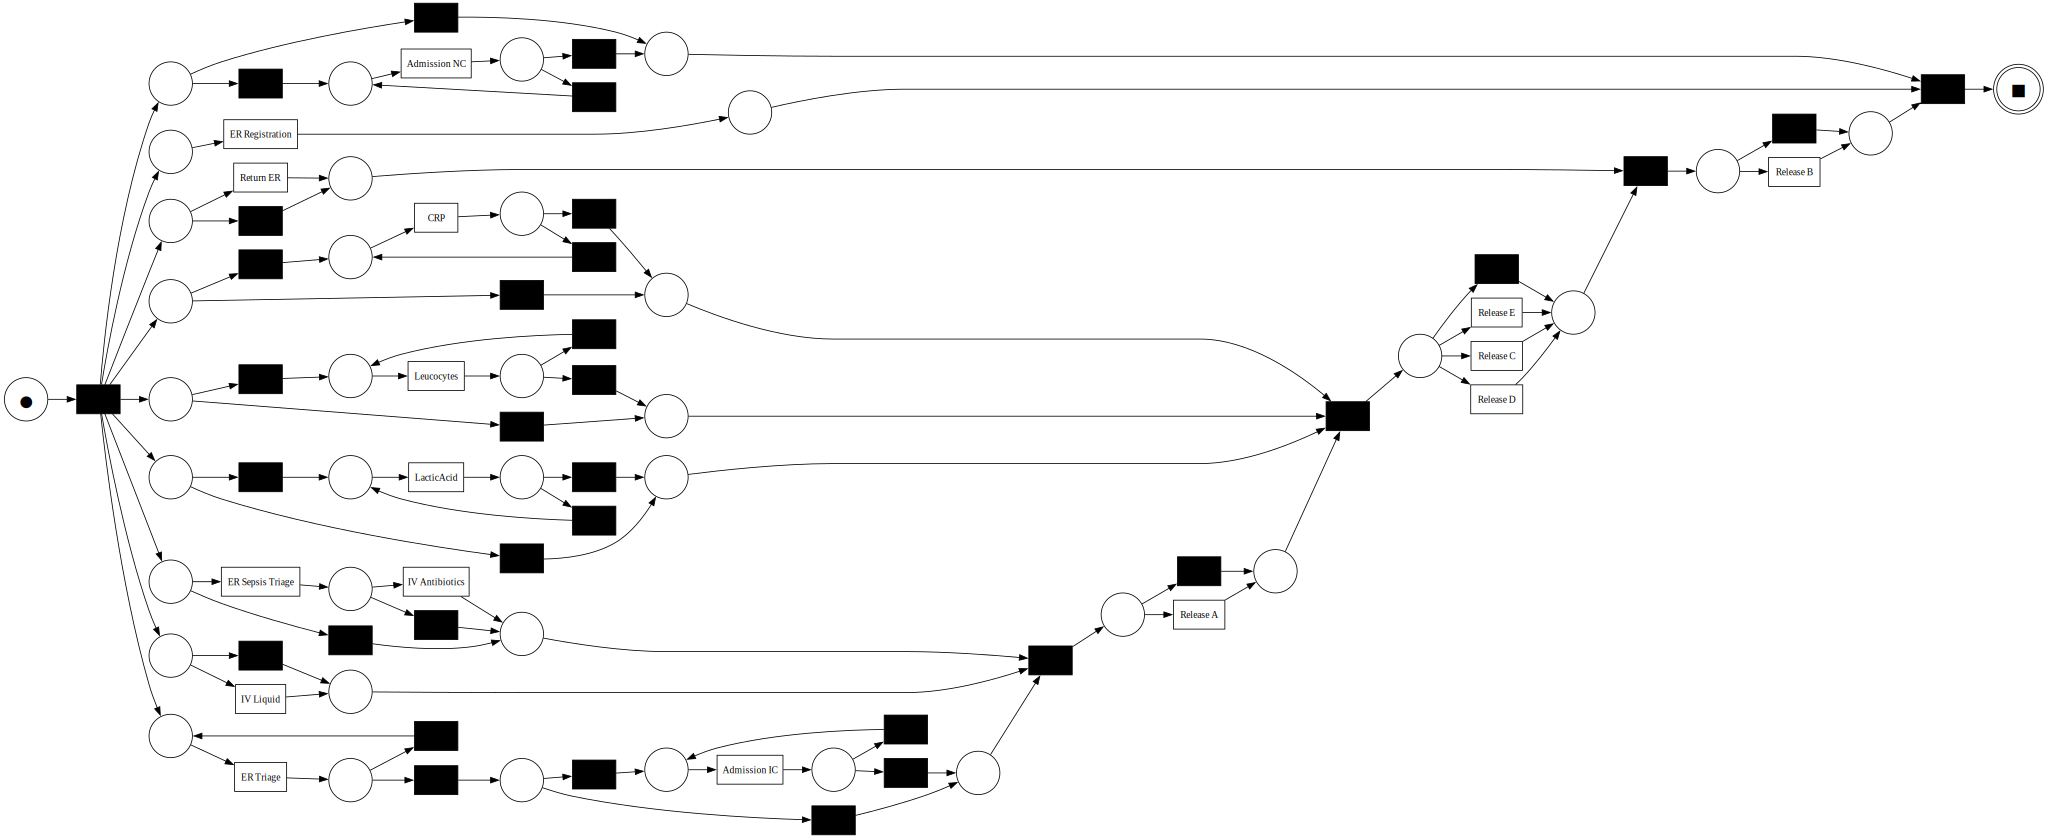

In [ ]:
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.objects.conversion.process_tree import converter as pt_converter
from IPython.display import display

# 1. Discover process tree
process_tree = inductive_miner.apply(log)

# 2. Convert to Petri net
net, im, fm = pt_converter.apply(process_tree)

# 3. Generate Graphviz object
gviz = pn_visualizer.apply(net, im, fm)

# 4. Display inline
display(gviz)


### What the output tell us?
- The model highlights parallel lab activities (CRP, Lactate, Leucocytes).
- Administrative steps appear early and late in the flow.
- Diagnostic and treatment steps form deeper parts of the model.


## 10. Frequency DFG (Directly‑Follows Graph)
This visualization shows the most common clinical paths. Thicker edges = more frequent transitions.


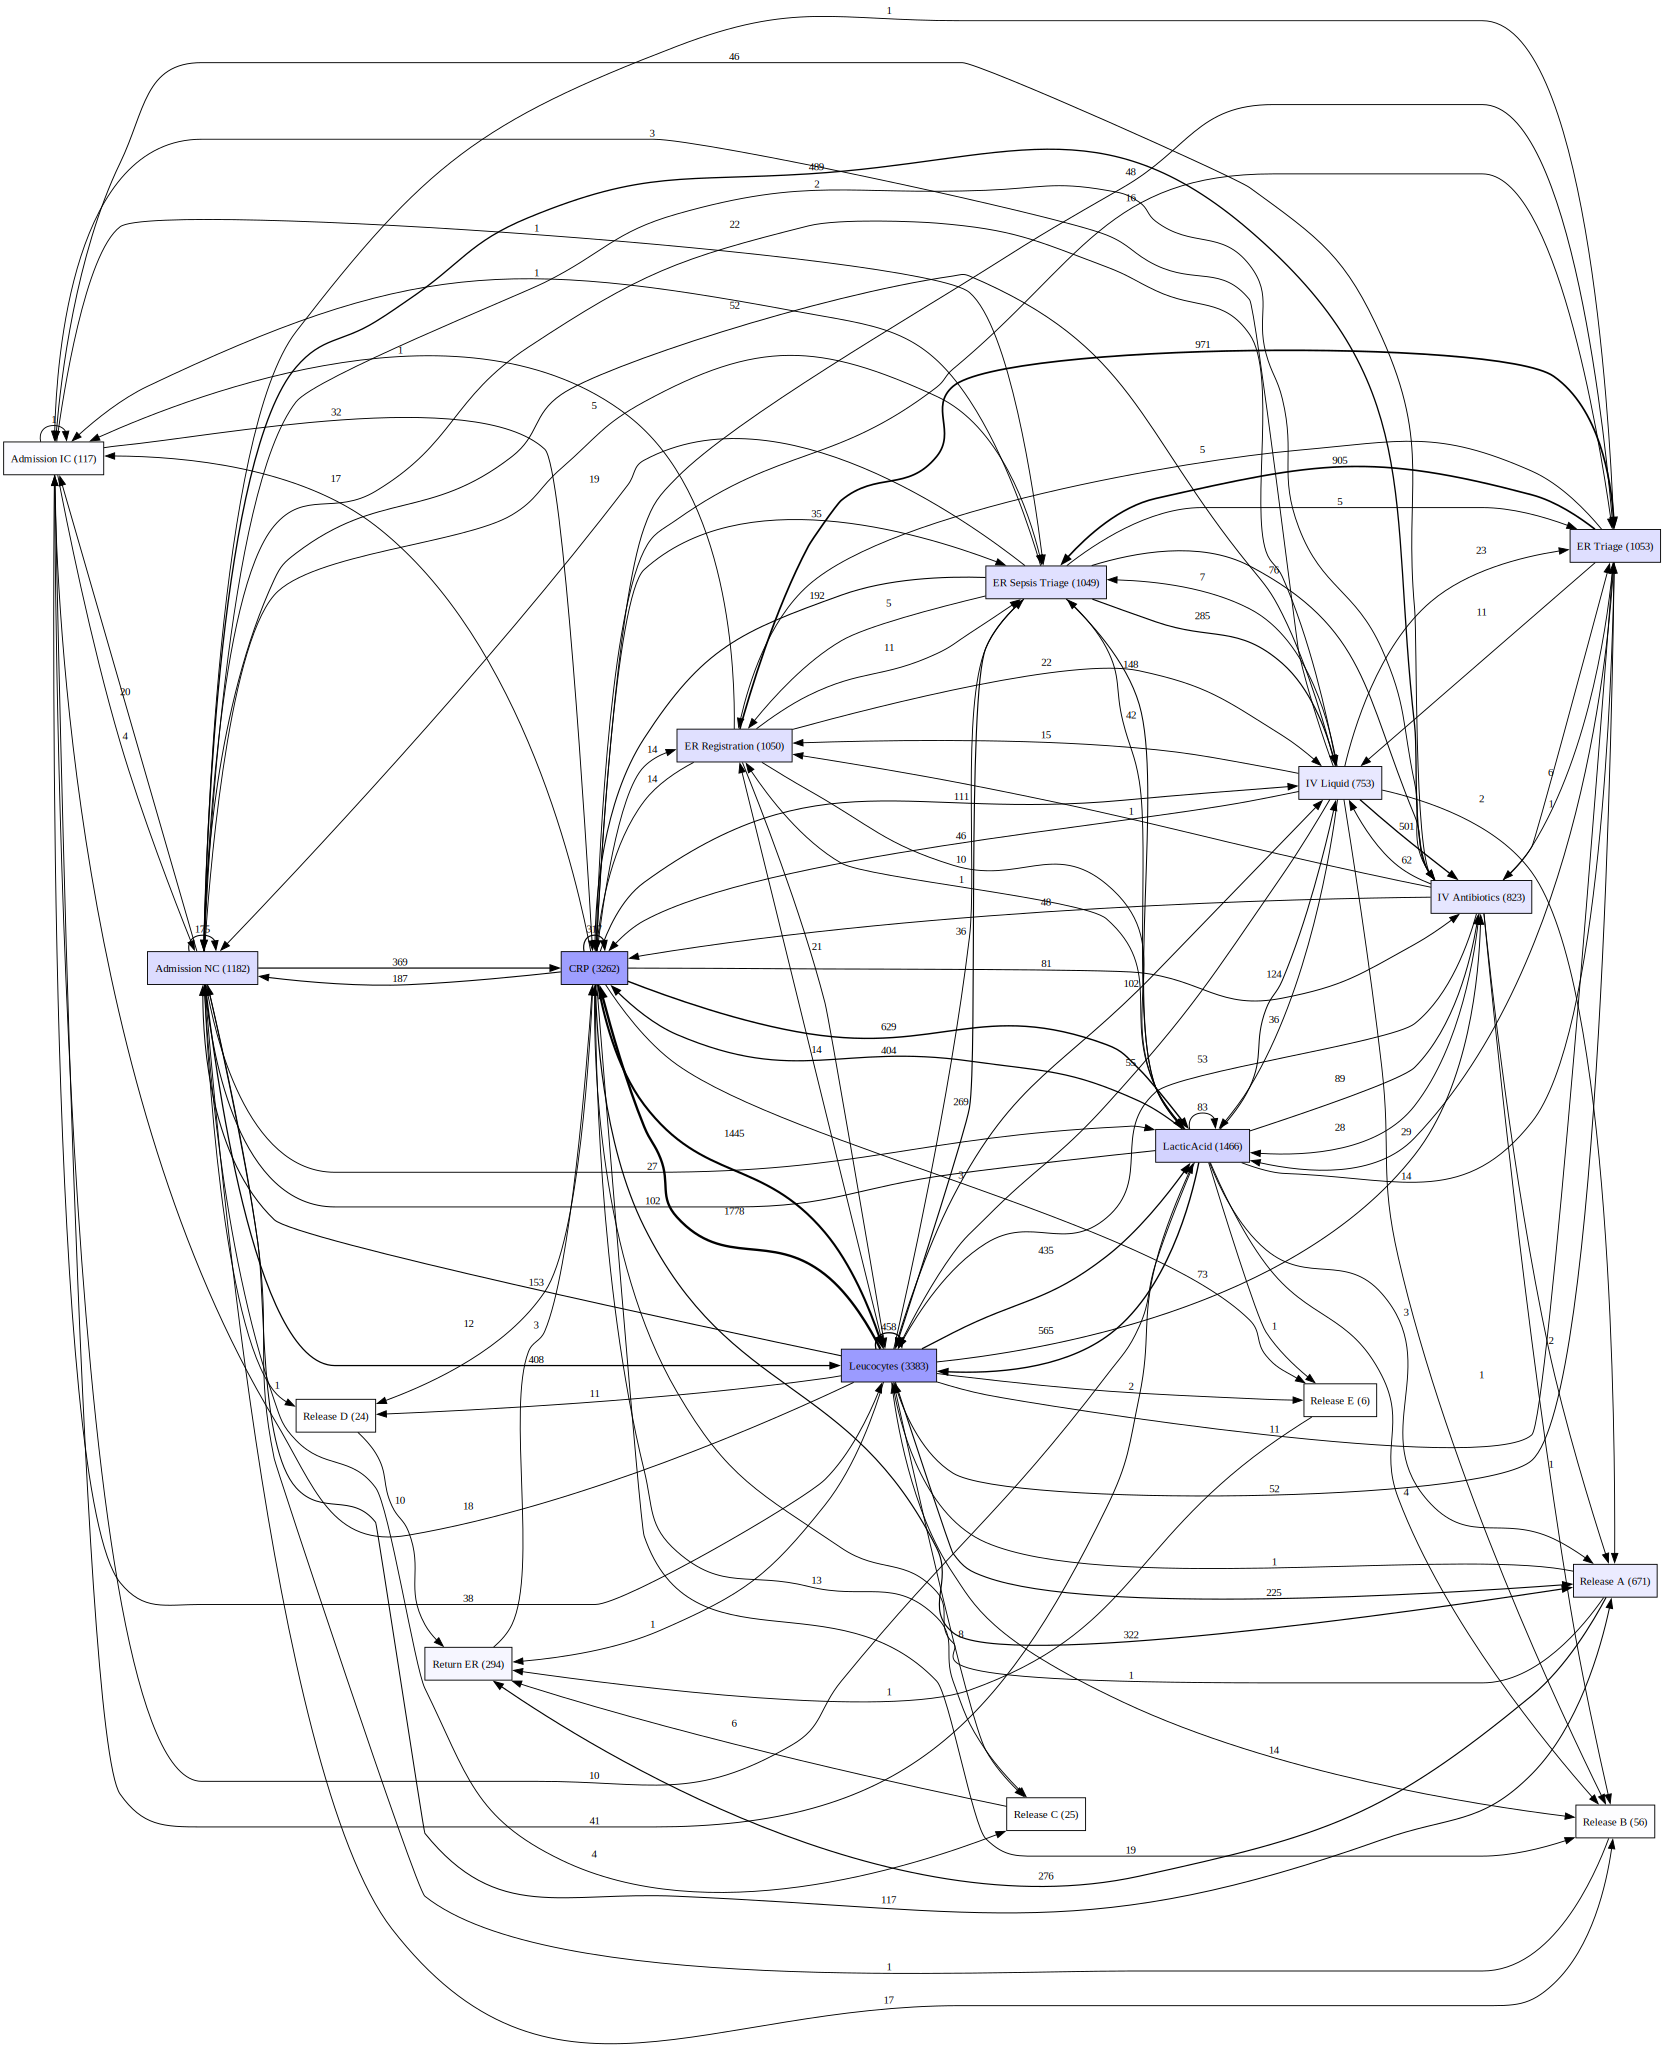

In [11]:
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.visualization.dfg import visualizer as dfg_visualizer
from IPython.display import Image

dfg = dfg_discovery.apply(log)
gviz_freq = dfg_visualizer.apply(dfg, log=log, variant=dfg_visualizer.Variants.FREQUENCY)
display(gviz_freq)

### What the Frequency‑Based viz tells us?
- Lab tests dominate early patient flow.
- Repeated or cyclic diagnostic evaluations appear.


## 11. Performance DFG
This visualization highlights bottlenecks. Edges are weighted by average time between transitions.
Redder/thicker edges indicate longer delays.


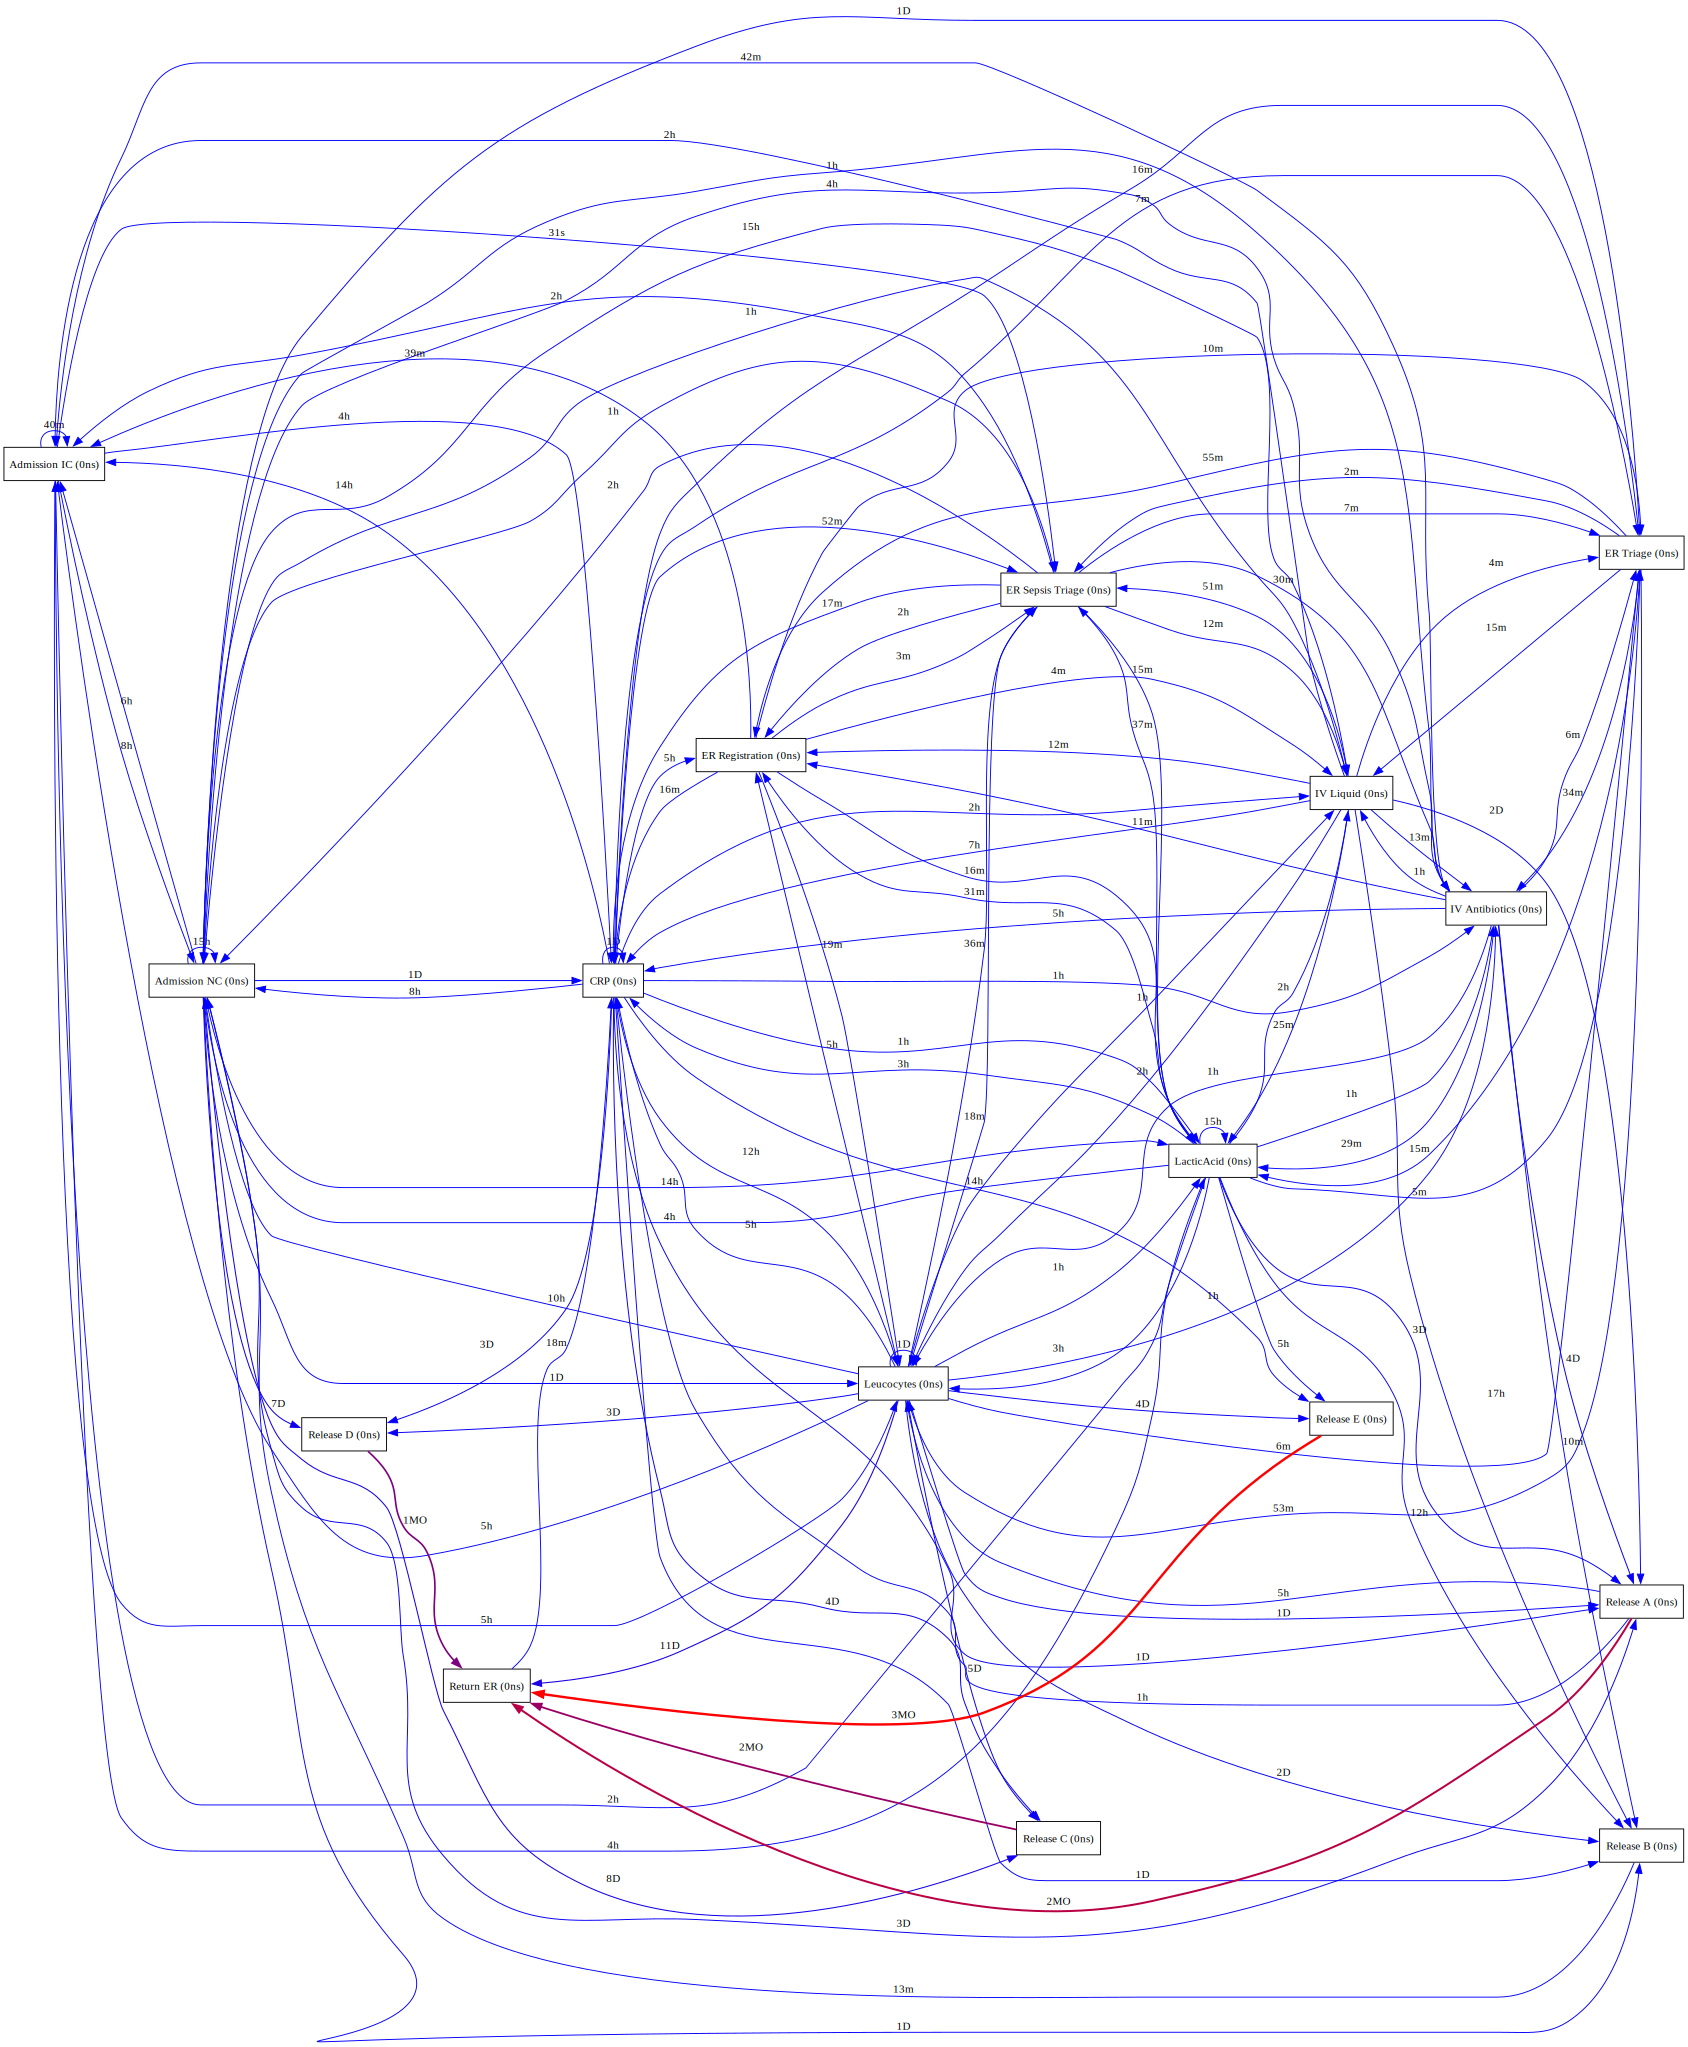

In [12]:
dfg_perf = dfg_discovery.apply(log, variant=dfg_discovery.Variants.PERFORMANCE)
gviz_perf = dfg_visualizer.apply(dfg_perf, log=log, variant=dfg_visualizer.Variants.PERFORMANCE)
display(gviz_perf)

### What does the performance viz tells us?
- Longest delay often between *Admission NC (In)* --> *Release C*.
- Lab processing steps contribute moderate delays.
- ER --> Lab routing introduces non-trivial waiting.
- Antibiotics administration is relatively fast once diagnosis is made.


## 12. Final Summary

In this notebook, I explored the Sepsis event log using process mining techniques in Python. I imported and cleaned the XES event log, analyzed patient cycle times, identified potential bottlenecks, and generated multiple process visualizations including the Petri net, frequency DFG, and performance DFG. These steps allowed me to understand patient flow, timing delays, and structural patterns in the clinical pathway. This notebook is organized into clearly labeled sections with explanations and visuals so it can be easily followed along.